In [1]:
%run -m celldom.nb.logging
import os
import os.path as osp
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
from celldom.core import cytometry
from celldom.config import experiment_config
from celldom.dataset import marker_dataset
from celldom.extract import NO_IMAGES, ALL_IMAGES, APT_IMAGES
from cvutils.visualize import display_images
import celldom
plt.gray()
None

In [2]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'exp-20181121-ML-FL-Sample'))

In [3]:
config.field_names

['street', 'channel', 'datetime', 'apartment', 'day', 'cohort']

In [4]:
config.path_regex

'.*/20181121-Mladder150-MOLM-Day(?P<day>[0-9]{1,2})-Chip1-40mbar-Greenplusred_(?P<cohort>1000mbarsqueeze|presqueeze)/(?P<channel>BF|CY5|GFP)_ST_(?P<street>[0-9]{3})_APT_(?P<apartment>[0-9]{3})_(?P<datetime>[0-9]{14}).tif'

In [5]:
test_path = 'MultiColorDataset/20181121_MOLMGreenRed_Experiments/20181121-Mladder150-MOLM-Day0-Chip1-40mbar-Greenplusred_1000mbarsqueeze/GFP_ST_000_APT_000_20181121141604.tif'
config.parse_path(test_path)

{'apartment': '000',
 'channel': 'GFP',
 'cohort': '1000mbarsqueeze',
 'datetime': Timestamp('2018-11-21 14:16:04'),
 'day': '0',
 'street': '000'}

In [6]:
import imp
imp.reload(cytometry)

<module 'celldom.core.cytometry' from '/lab/repos/celldom/python/source/celldom/core/cytometry.py'>

In [7]:
output_dir = '/tmp/test'
if osp.exists(output_dir):
    !rm -rf /tmp/test/*
cytometer = cytometry.Cytometer(config, output_dir)

In [8]:
cytometer.initialize()

Using TensorFlow backend.


In [9]:
img_dir = osp.join(celldom.get_data_dir(), 'dataset', 'dataset09')
paths = !find $img_dir | grep 1000mbarsqueeze | grep ST_000_APT_000
paths

['/lab/data/celldom/dataset/dataset09/20181121_MOLMGreenRed_Experiments/20181121-Mladder150-MOLM-Day0-Chip1-40mbar-Greenplusred_1000mbarsqueeze/BF_ST_000_APT_000_20181121141241.tif',
 '/lab/data/celldom/dataset/dataset09/20181121_MOLMGreenRed_Experiments/20181121-Mladder150-MOLM-Day0-Chip1-40mbar-Greenplusred_1000mbarsqueeze/CY5_ST_000_APT_000_20181121141610.tif',
 '/lab/data/celldom/dataset/dataset09/20181121_MOLMGreenRed_Experiments/20181121-Mladder150-MOLM-Day0-Chip1-40mbar-Greenplusred_1000mbarsqueeze/GFP_ST_000_APT_000_20181121141604.tif']

In [10]:
acq = cytometry.Acquisition(config, paths)

In [11]:
img = acq.load_image()
img.dtype, img.shape

(dtype('uint8'), (1024, 1376, 3))

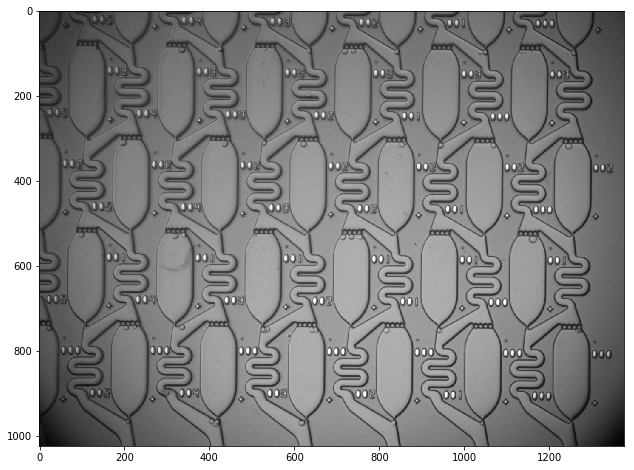

In [12]:
plt.imshow(img)
plt.gcf().set_size_inches(12, 8)

In [13]:
expr, ch = acq.load_expression()
expr.dtype, expr.shape, ch

(dtype('uint8'), (1024, 1376, 2), ['CY5', 'GFP'])

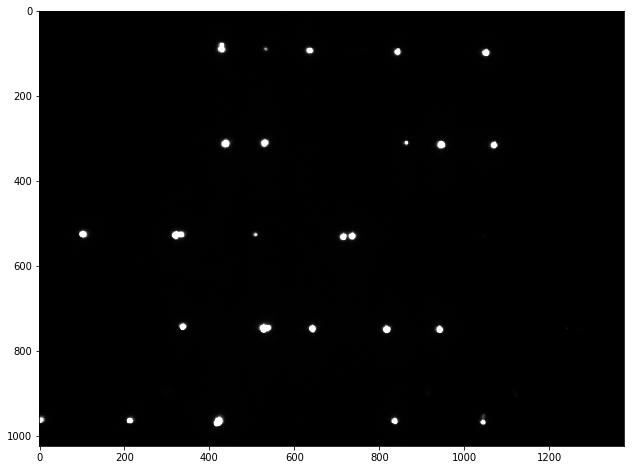

In [24]:
plt.imshow(expr[..., 1])
plt.gcf().set_size_inches(12, 8)

In [15]:
#cytometer.marker_model.config.display()

In [16]:
%%time
#acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=NO_IMAGES)
acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=ALL_IMAGES)
#acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=APT_IMAGES)

CPU times: user 10.3 s, sys: 8.97 s, total: 19.3 s
Wall time: 9.36 s


In [17]:
#cytometer.save(acq_data, apt_data, cell_data)

In [18]:
cytometer.datastore.store.flush()
cytometer.images.store.flush()

In [19]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
acq_apartment             1 non-null object
acq_channel               1 non-null object
acq_cohort                1 non-null object
acq_datetime              1 non-null datetime64[ns]
acq_day                   1 non-null object
acq_id                    1 non-null object
acq_processed_at          1 non-null datetime64[ns]
acq_street                1 non-null object
apt_count                 1 non-null int64
raw_image_path            1 non-null object
raw_image_shape_height    1 non-null int64
raw_image_shape_width     1 non-null int64
raw_norm_image            1 non-null object
rotation                  1 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(8)
memory usage: 192.0+ bytes


In [20]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 30 columns):
acq_apartment           24 non-null object
acq_channel             24 non-null object
acq_cohort              24 non-null object
acq_datetime            24 non-null datetime64[ns]
acq_day                 24 non-null object
acq_id                  24 non-null object
acq_processed_at        24 non-null datetime64[ns]
acq_street              24 non-null object
apt_id                  24 non-null int64
apt_image               24 non-null object
apt_image_height        24 non-null int64
apt_image_width         24 non-null int64
apt_num                 24 non-null object
apt_num_digit_images    24 non-null object
apt_num_digit_scores    24 non-null object
apt_num_image           24 non-null object
cell_count              24 non-null int64
expr_image              24 non-null object
focus_score             24 non-null float64
marker_center_x         24 non-null int64
marker_center_y         2

In [21]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 1
Data columns (total 27 columns):
acq_apartment       34 non-null object
acq_channel         34 non-null object
acq_cohort          34 non-null object
acq_datetime        34 non-null datetime64[ns]
acq_day             34 non-null object
acq_id              34 non-null object
acq_processed_at    34 non-null datetime64[ns]
acq_street          34 non-null object
apt_id              34 non-null int64
apt_num             34 non-null object
area                34 non-null int64
cell_id             34 non-null int64
cell_image          34 non-null object
centroid_x          34 non-null float64
centroid_y          34 non-null float64
eccentricity        34 non-null float64
expr_CY5            34 non-null float64
expr_GFP            34 non-null float64
in_chamber          34 non-null bool
in_trap             34 non-null bool
roi_xmax            34 non-null int64
roi_xmin            34 non-null int64
roi_ymax            34 non-n

In [22]:
cell_data.filter(regex='^expr').describe()

,expr_CY5,expr_GFP
count,34.000000,34.000000
mean,63.051676,131.183073
std,78.711502,113.382495
min,0.000000,0.043750
25%,0.000000,0.561791
50%,5.612066,155.058532
75%,119.035971,243.857238
max,253.756757,255.000000


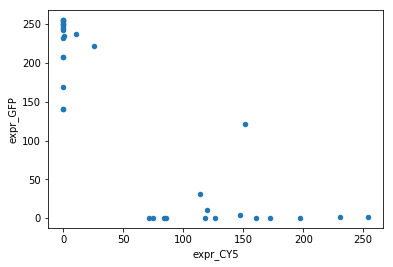

In [23]:
cell_data.plot(kind='scatter', x='expr_CY5', y='expr_GFP')

In [24]:
acq_data.rotation

0    0.41518
Name: rotation, dtype: float64

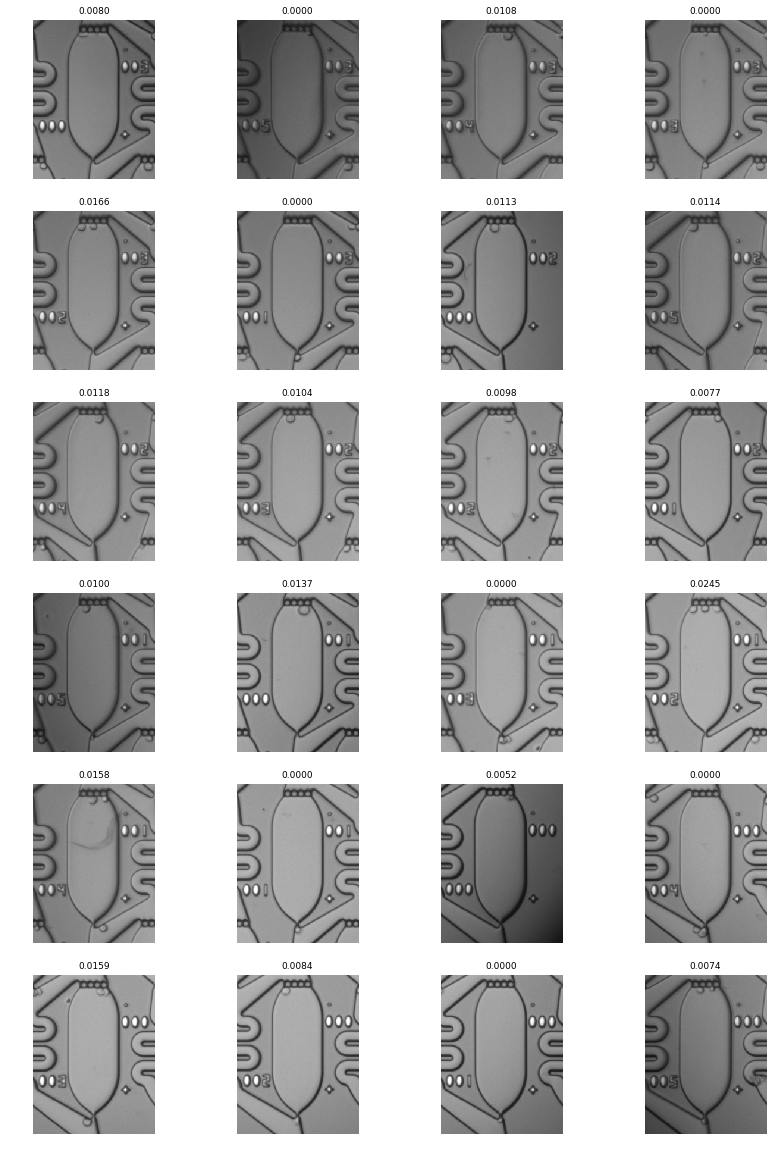

In [25]:
from cvutils.visualize import display_images
display_images(apt_data['apt_image'], titles=['{:.4f}'.format(v) for v in apt_data['occupancy_chamber']])

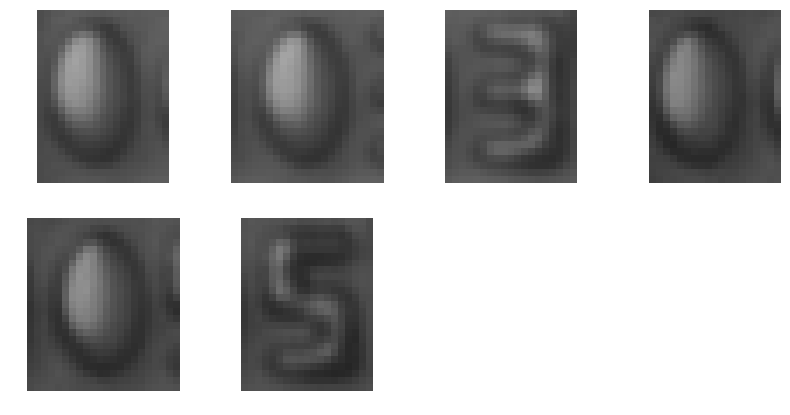

In [26]:
row = apt_data.iloc[1]
display_images(row['apt_num_digit_images'] + row['st_num_digit_images'])